<a href="https://colab.research.google.com/github/oscarvel821/data_science/blob/main/neural_network_from_scratch_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"oscarvelazquez","key":"2210797b48a0848598db88f7c606c574"}'}

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          32851        891  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           4098        118  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           6212        129  1.0              
mohithsairamreddy/salary-data 

In [7]:
! kaggle competitions download -c digit-recognizer

 52% 8.00M/15.3M [00:00<00:00, 78.2MB/s]
100% 15.3M/15.3M [00:00<00:00, 65.2MB/s]


In [8]:
! unzip /content/digit-recognizer.zip

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Digit dataset

In [9]:
raw_df = pd.read_csv('/content/train.csv')

In [10]:
raw_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


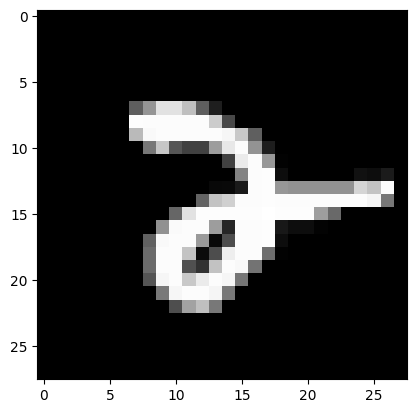

In [11]:
# pick a sample to plot
sample = 34
image = raw_df.iloc[sample].values[1:786]
# plot the sample
fig = plt.figure
plt.imshow(image.reshape(28,28), cmap='gray')
plt.show()

In [12]:
images = []
labels = []
nums = 10
for i in range(nums):
  label = raw_df.iloc[i].values[0]
  img = raw_df.iloc[i].values[1:786]
  labels.append(label)
  images.append(img.reshape(28,28))

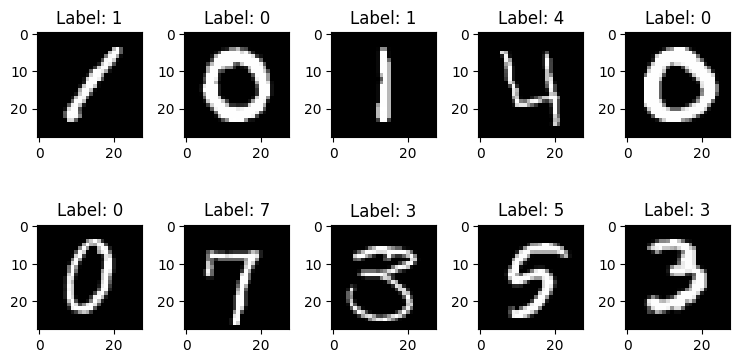

In [13]:
num_col = 5
num_row = 2

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(nums):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [14]:
y = raw_df['label'].to_numpy()

In [15]:
xi = ((raw_df.drop(['label'], axis=1)).iloc[0:42000]).to_numpy()

In [16]:
x_train, x_val, y_train, y_val = train_test_split(xi, y, test_size=0.20, random_state=12)

# Data augmentation

In [17]:
x_train_images = np.array([x.reshape(28,28) for x in x_train])

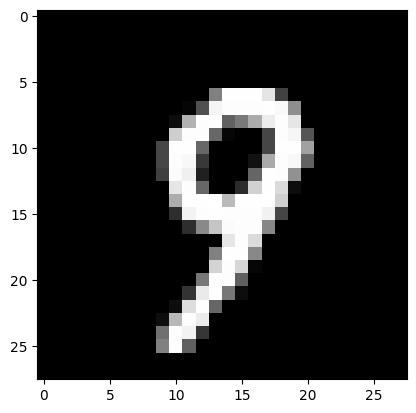

In [18]:
# plot the sample
fig = plt.figure
plt.imshow(x_train_images[0], cmap='gray')
plt.show()

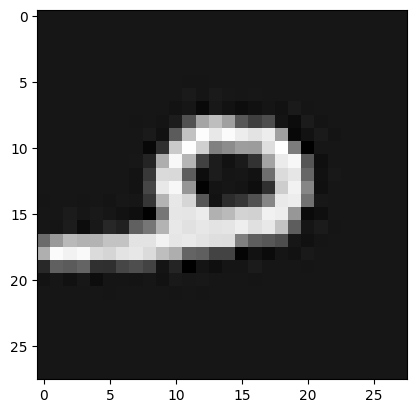

In [19]:
from scipy.ndimage import shift
from scipy.ndimage import rotate

rotated_image = rotate(x_train_images[0], -50, reshape=False)
rotated_image = shift(rotated_image, (0,-2), mode="constant")

# plot the sample
fig = plt.figure
plt.imshow(rotated_image, cmap='gray')
plt.show()

In [20]:
X_train_augmented = np.zeros((len(x_train) * 4, 28 * 28))

In [21]:
Y_train_augmented = np.zeros(len(x_train) * 4, dtype=int)

In [22]:
Y_train_augmented[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
augmented_index = 0

for dx, dy in ((-1,0), (0,1), (1,0), (0, -1)):
  for j in range(len(x_train)):
    angle = np.random.randint(-3, 3)
    augmented_image = rotate(x_train_images[j], angle=angle, reshape=False)
    augmented_image = shift(augmented_image, (dx, dy), mode="constant", cval=0)

    X_train_augmented[augmented_index] = augmented_image.reshape(28 * 28)
    Y_train_augmented[augmented_index] = int(y_train[j])
    augmented_index += 1

In [24]:
X_train_augmented[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

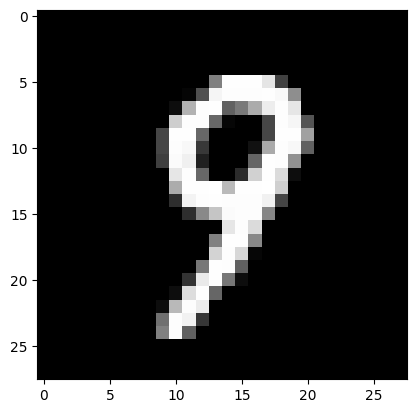

In [25]:
# plot the sample
fig = plt.figure
plt.imshow(X_train_augmented[0].reshape(28, 28), cmap='gray')
plt.show()

In [26]:
Y_train_augmented[0]

9

# Neural Network

In [27]:
class DenseLayer:
  def __init__(self, numOfNodesIn, numOfNodesOut):
    self.numOfNodesIn= numOfNodesIn
    self.numOfNodesOut = numOfNodesOut
    self.weights = np.random.uniform(-1, 1, size=(self.numOfNodesIn, self.numOfNodesOut))
    self.bias = np.random.uniform(-1,1,size=(self.numOfNodesOut))
    self.weightsChange = np.zeros((self.numOfNodesIn, self.numOfNodesOut))
    self.biasChange = np.zeros((self.numOfNodesOut))

  def forward(self, inputs):
    self.inputs = inputs
    return np.dot(inputs, self.weights) + self.bias

  def backward(self, error, learning_rate, momentum):
    weights_error = np.dot(self.inputs.T, error) * (1/len(self.inputs))
    bias_error = np.sum(error.T, 1) * (1/len(self.inputs))
    input_error = np.dot(error, self.weights.T)

    weights_diff = weights_error * learning_rate + momentum * self.weightsChange
    bias_diff = bias_error * learning_rate + momentum * self.biasChange

    self.weights = self.weights - weights_diff
    self.bias = self.bias - bias_diff

    self.weightsChange = weights_diff
    self.biasChange = bias_diff

    return input_error

In [28]:
class ActivationLayer:
  def __init__(self, activation, activation_prime):
    self.activation = activation
    self.activation_prime = activation_prime

  def forward(self, inputs):
    self.inputs = inputs
    return self.activation(inputs)

  def backward(self, error, learning_rate, momentum):
    return error * self.activation_prime(self.inputs)

In [29]:
class SoftmaxLayer:
  def __init__(self, input_size, loss=None):
    self.input_size = input_size
    self.loss = loss

  def forward(self, inputs):
    #subtracting the max of z for numerical stability
    exp = np.exp( inputs - np.max(inputs) )

    for i in range(len(inputs)):
      exp[i] /= np.sum(exp[i])

    self.output = exp

    return exp

  def backward(self, error, learning_rate, momentum):
    if self.loss == "cross entropy loss":
      return self.output - error

    output = np.zeros((len(error), self.input_size))
    for i in range(len(error)):
      out = np.tile(self.output[i], (self.input_size, 1))
      I = np.identity(self.input_size)
      da = np.dot(out.T * (I - out), error[i])
      output[i] = da

    return output

In [30]:
def Relu(x):
  return np.maximum(0, x)

def deriv_Relu(x):
  return x > 0

In [31]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  return np.exp(-x) / (1 + np.exp(-x))**2

In [32]:
def tahn(x):
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def deriv_tahn(x):
  return 1 - tahn(x)**2

In [33]:
def mse(y_true, y_hat):
  return np.power((y_true - y_hat), 2).mean()

def deriv_mse(y_true, y_hat):
  return 2 * (y_true - y_hat) / len(y_hat)

In [34]:
def cross_entropy_loss(y_true, y_hat):
  return -np.mean(np.log(y_hat[np.arange(len(y_true)), y_true] + 1e-8))

In [35]:
class Network:
  def __init__(self):
    self.layers = []
    self.loss = None
    self.deriv_loss = None

  @staticmethod
  def normalize(X):
    # return (X - X.mean(axis=0)) / X.std(axis=0)
    # m = np.max(X)
    # return X / m
    #for digit dataset
    return X / 255

  @staticmethod
  def one_hot(y, c):
    y_hot = np.zeros((len(y), c))

    y_hot[np.arange(len(y)), y] = 1

    return y_hot

  def add(self, layer):
    self.layers.append(layer)

  def use(self, loss, deriv_loss):
    self.loss = loss
    self.deriv_loss = deriv_loss

  def forward_pass(self, inputs):
    output = inputs
    for layer in self.layers:
      output = layer.forward(output)

    return output

  def backward_propagation(self, error, learning_rate, momentum):
    output_error = error

    for layer in reversed(self.layers):
      output_error = layer.backward(output_error, learning_rate, momentum)

    return output_error

  def predict(self, inputs):

    inputs = self.normalize(inputs)

    prob = self.forward_pass(inputs)

    return prob, np.argmax(prob, axis=1)

  def train(self, X, y, learning_rate, momentum=0.0, epochs=100, batch_size=100):

    M, n = X.shape

    x = self.normalize(X)

    hist = []

    # training
    for epoch in range(epochs):
      print(f'epoch {epoch + 1}/{epochs}')

      shuffled_indices = np.random.permutation(M)
      shuffled_x = x[shuffled_indices]
      shuffled_y = y[shuffled_indices]

      for i in range((M-1)//batch_size + 1):

        start_i = i * batch_size
        end_i = start_i + batch_size

        xi = shuffled_x[start_i:end_i]
        yi = shuffled_y[start_i:end_i]

        y_hot = self.one_hot(yi, self.layers[-1].input_size)

        #forward
        output = self.forward_pass(xi)

        #error
        loss = self.loss(yi, output)
        hist.append(loss)

        #backward
        if self.deriv_loss == "cross entropy loss" and isinstance(self.layers[-1], SoftmaxLayer):
          output_error = y_hot
        else:
          output_error = self.deriv_loss(y_hot, output)

        output_error = self.backward_propagation(output_error, learning_rate, momentum)

      print(f'loss = {loss}')

    return hist


  # def train(self, X, y, learning_rate, epochs=100):

  #   x = self.normalize(X)

  #   hist = []

  #   # training
  #   for epoch in range(epochs):
  #     # forward
  #     output = self.forward_pass(x)

  #     # error (display purpose only)
  #     error = self.loss(y, output)
  #     hist.append(error)

  #     # backward
  #     # output_error = deriv_mse(one_hot_labels, output)

  #     y_hot = self.one_hot(y, self.layers[-1].input_size)

  #     if self.deriv_loss == "cross entropy loss" and isinstance(self.layers[-1], SoftmaxLayer):
  #       output_error = y_hot
  #     else:
  #       output_error = self.deriv_loss(y_hot, output)

  #     self.backward_propagation(output_error, learning_rate)

  #     print(f'{epoch + 1}/{epochs}, loss = {error}')

  #   return hist


# Trying models with different activation functions

## Relu functin

In [36]:
model_1 = Network()

In [37]:
model_1.add(DenseLayer(784,128))
model_1.add(ActivationLayer(Relu, deriv_Relu))
model_1.add(DenseLayer(128,10))
model_1.add(SoftmaxLayer(10, loss="cross entropy loss"))

In [38]:
model_1.use(cross_entropy_loss, "cross entropy loss")

In [39]:
history_1 = model_1.train(X_train_augmented, Y_train_augmented, 0.1, 0.9, 40, 100)

epoch 1/40
loss = 0.26026836558658745
epoch 2/40
loss = 0.3014509293384004
epoch 3/40
loss = 0.2254820287749845
epoch 4/40
loss = 0.2413384517168355
epoch 5/40
loss = 0.1547165309073637
epoch 6/40
loss = 0.06788035144834396
epoch 7/40
loss = 0.045086080821410954
epoch 8/40
loss = 0.1470120053959896
epoch 9/40
loss = 0.043495933823806385
epoch 10/40
loss = 0.13147261078548397
epoch 11/40
loss = 0.0256159689172182
epoch 12/40
loss = 0.14668990581117294
epoch 13/40
loss = 0.03786694412383089
epoch 14/40
loss = 0.06849231485722422
epoch 15/40
loss = 0.05871730756129427
epoch 16/40
loss = 0.10766276253080098
epoch 17/40
loss = 0.030687504207251467
epoch 18/40
loss = 0.019228839610284088
epoch 19/40
loss = 0.036880259916751285
epoch 20/40
loss = 0.01425084344178168
epoch 21/40
loss = 0.03818710840905055
epoch 22/40
loss = 0.06192041570834722
epoch 23/40
loss = 0.001593236676509609
epoch 24/40
loss = 0.0205320870795427
epoch 25/40
loss = 0.010551098152455661
epoch 26/40
loss = 0.0290219923151

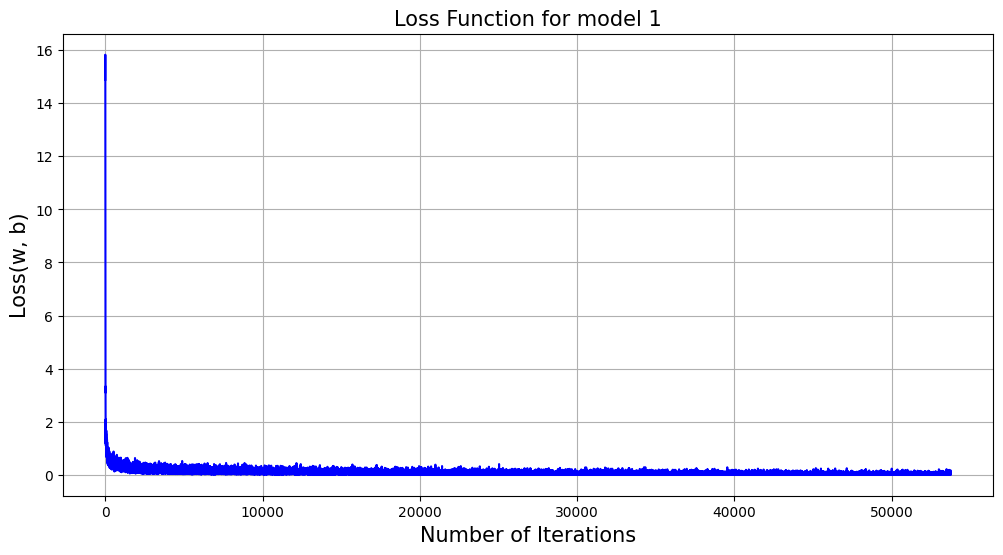

In [40]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title("Loss Function for model 1", fontsize='15')
plt.xlabel('Number of Iterations', fontsize='15')
plt.ylabel(r'Loss(w, b)', fontsize='15')
# plt.figtext(x=.56, y=.6, s="At the final iteration:\n\nw = {}\nb = {}".format(w, b))
ax.plot(history_1, 'b')
ax.grid()
plt.show()

In [41]:
prob_1, y_hat_1 = model_1.predict(x_val)

In [45]:
accuracy = np.sum(y_val == y_hat_1) / len(y_val)

In [46]:
accuracy

0.9719047619047619

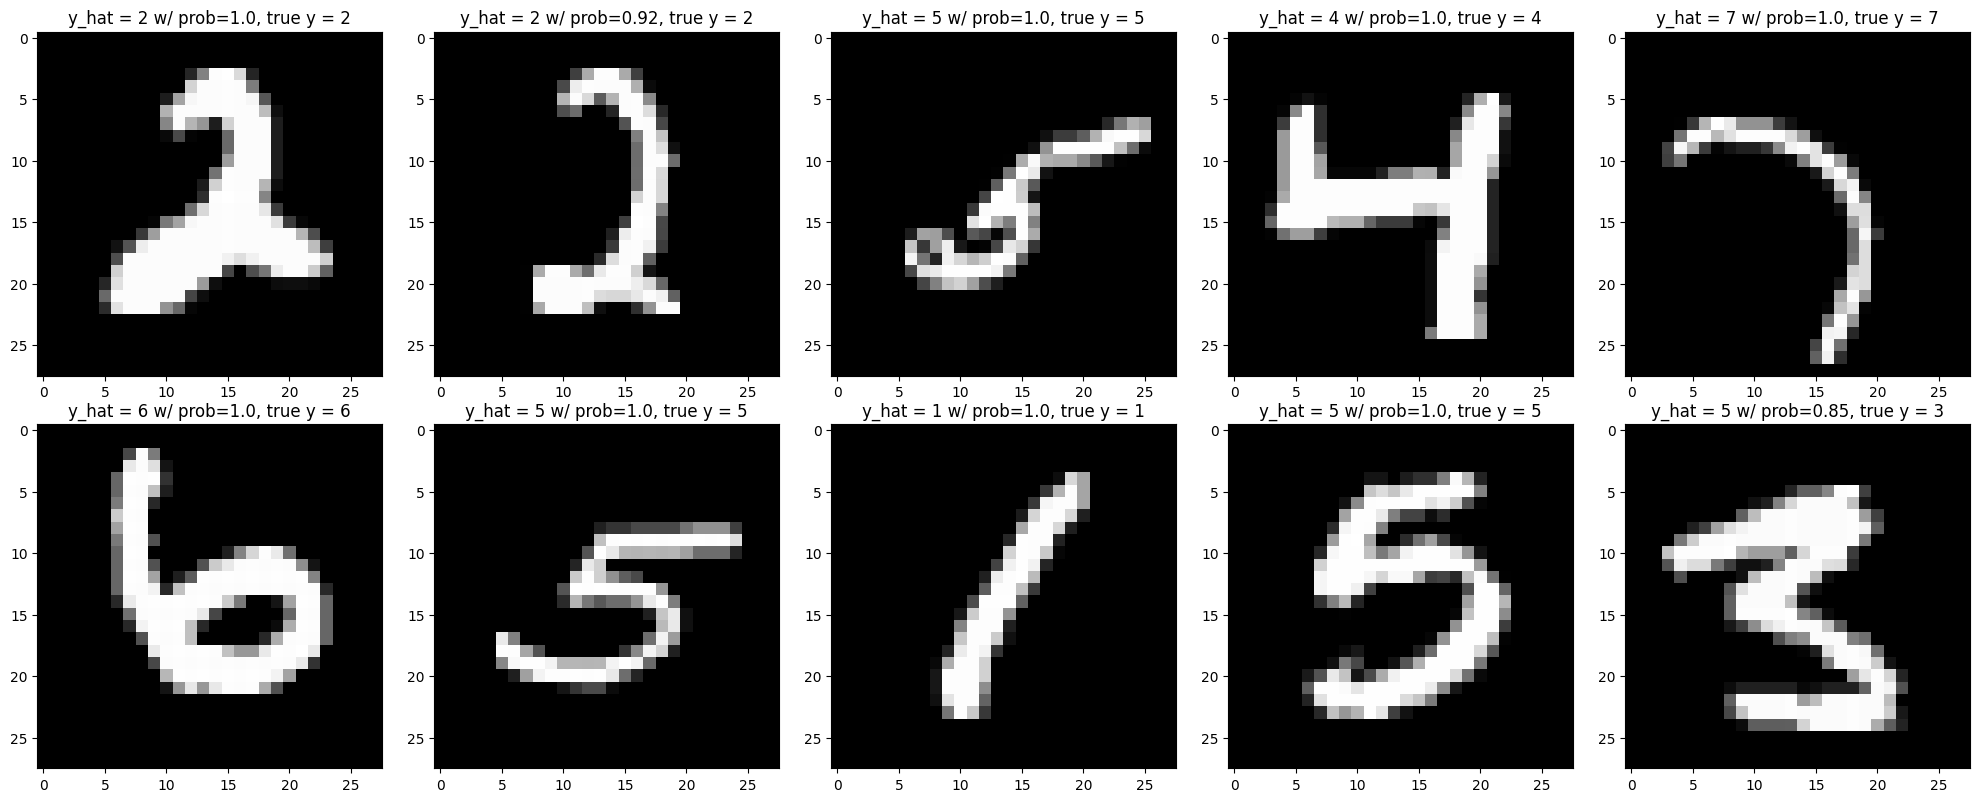

In [48]:
num_col = 5
num_row = 2
nums = 10

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(4*num_col,4*num_row))
for i in range(nums):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_val[i].reshape(28,28), cmap='gray')
    ax.set_title(f'y_hat = {y_hat_1[i]} w/ prob={round(np.max(prob_1[i]), 2)}, true y = {y_val[i]}')
plt.tight_layout()
plt.show()

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix_1 = confusion_matrix(y_val, y_hat_1)
print(confusion_matrix_1)

[[844   0   3   0   0   0   5   0   4   1]
 [  0 930   1   2   1   0   1   0   4   0]
 [  3   3 772   9   2   0   0   2   8   1]
 [  1   1   2 867   0  12   0   0   9   3]
 [  0   2   0   0 760   0   2   1   1  17]
 [  1   1   0   6   0 734   9   2   2   5]
 [  2   0   1   1   1   1 848   0   1   0]
 [  2   4   8   2   3   2   0 827   2   9]
 [  3   2   5   7   4   6   6   1 781   5]
 [  3   2   0   4  12   3   0   3   4 801]]


## Sigmoid function

In [54]:
model_2 = Network()

In [55]:
model_2.add(DenseLayer(784,128))
model_2.add(ActivationLayer(sigmoid, deriv_sigmoid))
model_2.add(DenseLayer(128,10))
model_2.add(SoftmaxLayer(10, loss="cross entropy loss"))

In [56]:
model_2.use(cross_entropy_loss, "cross entropy loss")

In [57]:
history_2 = model_2.train(X_train_augmented, Y_train_augmented, 0.1, 0.9, 40, 100)

epoch 1/40
loss = 0.20180789859068823
epoch 2/40
loss = 0.1252456293605497
epoch 3/40
loss = 0.14329070460814322
epoch 4/40
loss = 0.22894820678949007
epoch 5/40
loss = 0.11184795581212245
epoch 6/40
loss = 0.1074173860611707
epoch 7/40
loss = 0.09488457272008509
epoch 8/40
loss = 0.06665746539342128
epoch 9/40
loss = 0.12365028583953609
epoch 10/40
loss = 0.03968886197690624
epoch 11/40
loss = 0.08425477213762272
epoch 12/40
loss = 0.05139817397760071
epoch 13/40
loss = 0.01384809148981173
epoch 14/40
loss = 0.07266975802651854
epoch 15/40
loss = 0.04039459820395688
epoch 16/40
loss = 0.02559463021747218
epoch 17/40
loss = 0.027431459322334394
epoch 18/40
loss = 0.01600141042560888
epoch 19/40
loss = 0.01672815023387383
epoch 20/40
loss = 0.018004894668949393
epoch 21/40
loss = 0.046566655163340326
epoch 22/40
loss = 0.02108499671796036
epoch 23/40
loss = 0.06087927745576142
epoch 24/40
loss = 0.010270408916267421
epoch 25/40
loss = 0.13353574076971209
epoch 26/40
loss = 0.01220420228

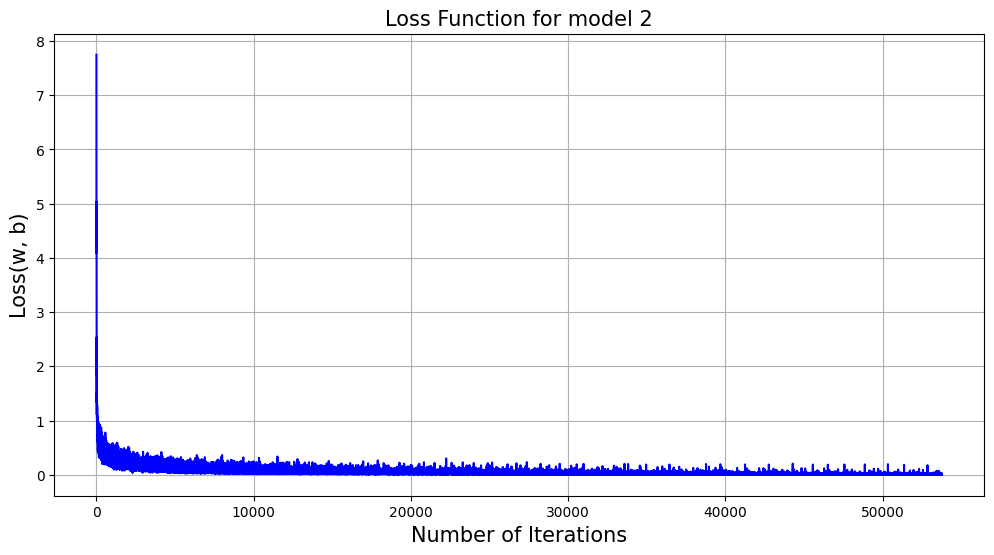

In [58]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title("Loss Function for model 2", fontsize='15')
plt.xlabel('Number of Iterations', fontsize='15')
plt.ylabel(r'Loss(w, b)', fontsize='15')
# plt.figtext(x=.56, y=.6, s="At the final iteration:\n\nw = {}\nb = {}".format(w, b))
ax.plot(history_2, 'b')
ax.grid()
plt.show()

In [59]:
prob_2, y_hat_2 = model_2.predict(x_val)

In [60]:
accuracy_2 = np.sum(y_val == y_hat_2) / len(y_val)

In [69]:
accuracy_2

0.9773809523809524

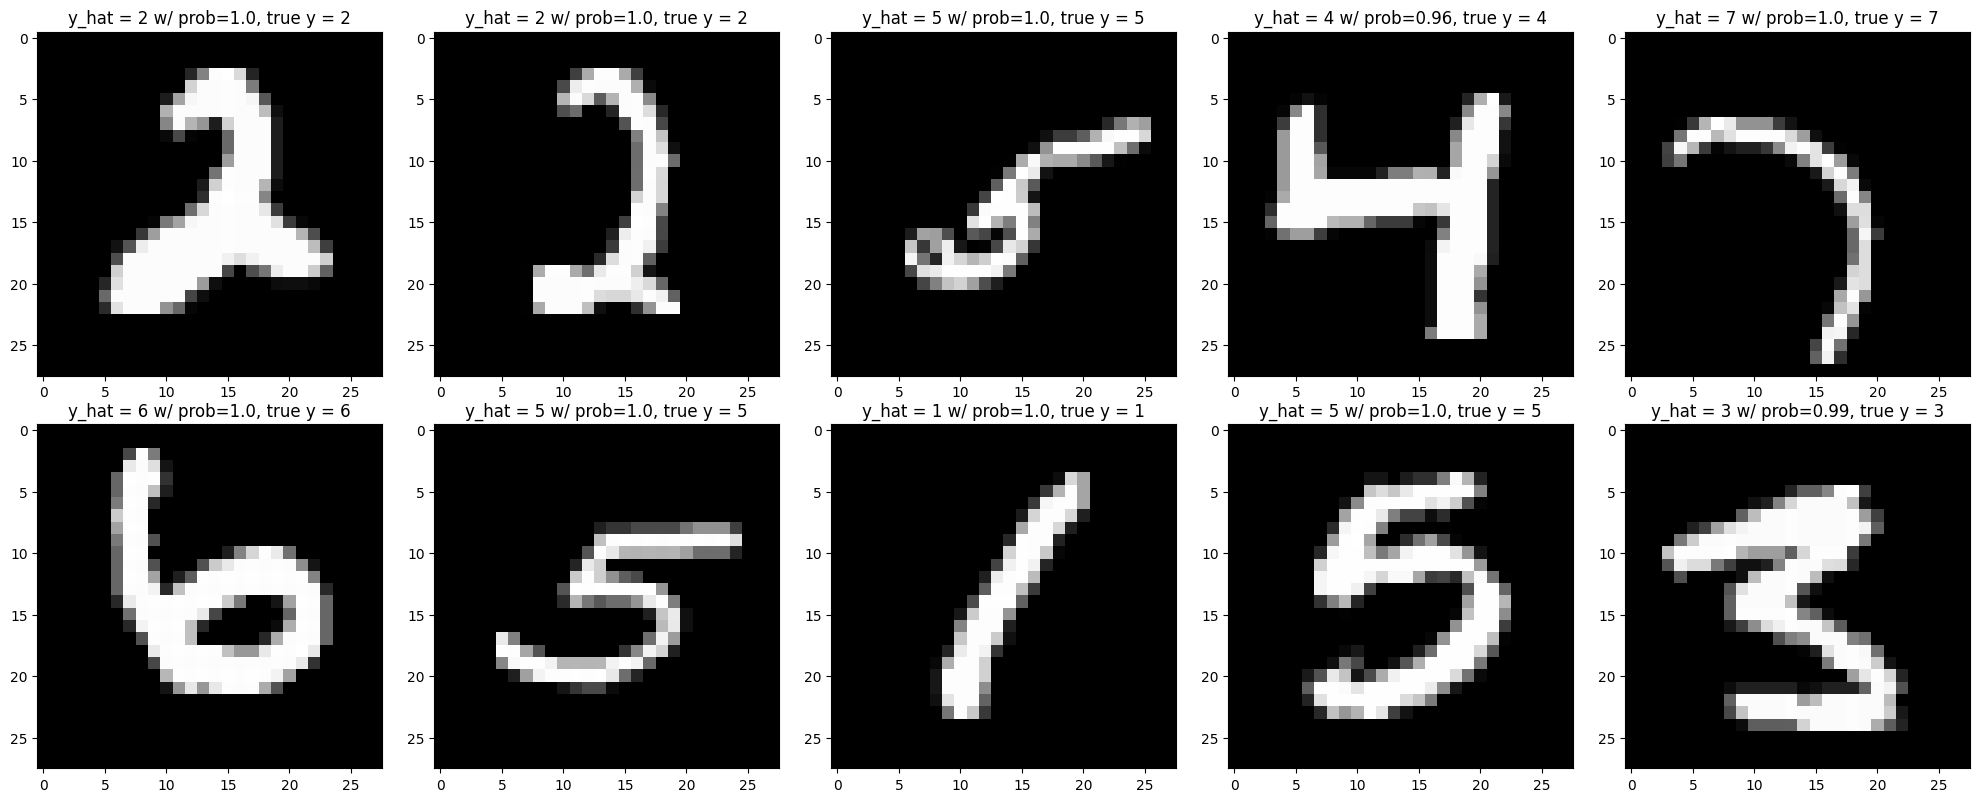

In [63]:
num_col = 5
num_row = 2
nums = 10

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(4*num_col,4*num_row))
for i in range(nums):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_val[i].reshape(28,28), cmap='gray')
    ax.set_title(f'y_hat = {y_hat_2[i]} w/ prob={round(np.max(prob_2[i]), 2)}, true y = {y_val[i]}')
plt.tight_layout()
plt.show()

In [78]:
confusion_matrix_2 = confusion_matrix(y_val, y_hat_2)
print(confusion_matrix_2)

[[850   0   2   1   0   0   1   0   3   0]
 [  0 929   1   1   0   0   0   1   6   1]
 [  3   1 770   8   2   2   1   2  10   1]
 [  0   2   3 874   0   4   0   2   8   2]
 [  0   3   0   0 763   0   1   1   1  14]
 [  1   0   0   6   3 739   5   1   3   2]
 [  2   1   2   0   2   4 843   0   1   0]
 [  2   2   5   4   0   0   0 837   2   7]
 [  0   2   1   1   2   4   0   0 808   2]
 [  2   1   2   4  12   3   0   3   8 797]]


## Tahn function

In [64]:
model_3 = Network()

In [65]:
model_3.add(DenseLayer(784,128))
model_3.add(ActivationLayer(tahn, deriv_tahn))
model_3.add(DenseLayer(128,10))
model_3.add(SoftmaxLayer(10, loss="cross entropy loss"))

In [66]:
model_3.use(cross_entropy_loss, "cross entropy loss")

In [67]:
history_3 = model_3.train(X_train_augmented, Y_train_augmented, 0.1, 0.9, 40, 100)

epoch 1/40
loss = 0.2149382747863111
epoch 2/40
loss = 0.2624802677743149
epoch 3/40
loss = 0.20516179876076543
epoch 4/40
loss = 0.16377937166946827
epoch 5/40
loss = 0.15974107282573125
epoch 6/40
loss = 0.037271910954746336
epoch 7/40
loss = 0.09618526234539532
epoch 8/40
loss = 0.07828125081296969
epoch 9/40
loss = 0.0847099877827055
epoch 10/40
loss = 0.033658546364829726
epoch 11/40
loss = 0.044615815295879095
epoch 12/40
loss = 0.021733024649815122
epoch 13/40
loss = 0.055969762268533244
epoch 14/40
loss = 0.05108162290196941
epoch 15/40
loss = 0.02467180658355605
epoch 16/40
loss = 0.04772637645614807
epoch 17/40
loss = 0.04931001304171652
epoch 18/40
loss = 0.015116982212251075
epoch 19/40
loss = 0.013277625953501904
epoch 20/40
loss = 0.006545854605460541
epoch 21/40
loss = 0.015229105921221184
epoch 22/40
loss = 0.007334284098691713
epoch 23/40
loss = 0.023573965972043767
epoch 24/40
loss = 0.007210616421064792
epoch 25/40
loss = 0.0010225743212574489
epoch 26/40
loss = 0.02

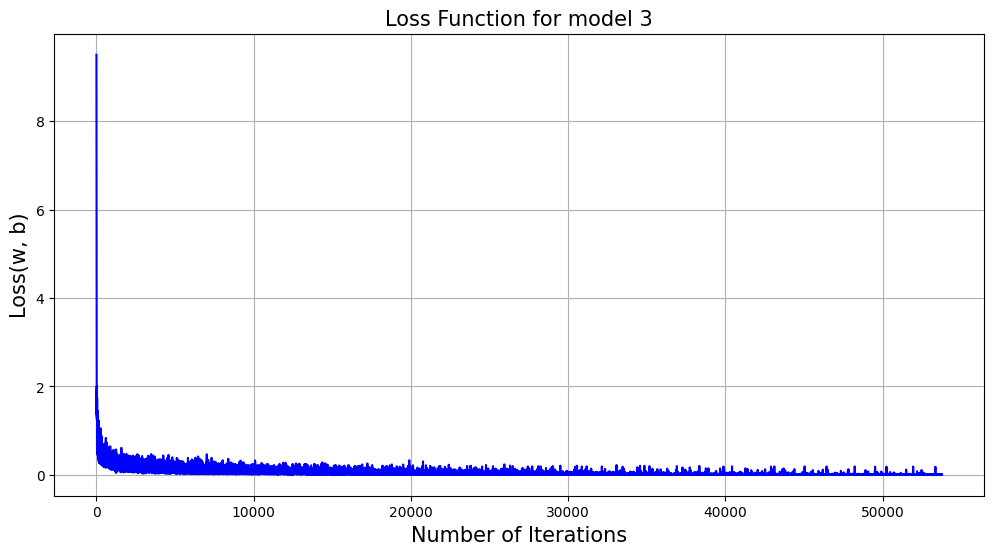

In [70]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title("Loss Function for model 3", fontsize='15')
plt.xlabel('Number of Iterations', fontsize='15')
plt.ylabel(r'Loss(w, b)', fontsize='15')
# plt.figtext(x=.56, y=.6, s="At the final iteration:\n\nw = {}\nb = {}".format(w, b))
ax.plot(history_3, 'b')
ax.grid()
plt.show()

In [71]:
prob_3, y_hat_3 = model_3.predict(x_val)

In [72]:
accuracy_3 = np.sum(y_val == y_hat_3) / len(y_val)

In [73]:
accuracy_3

0.9729761904761904

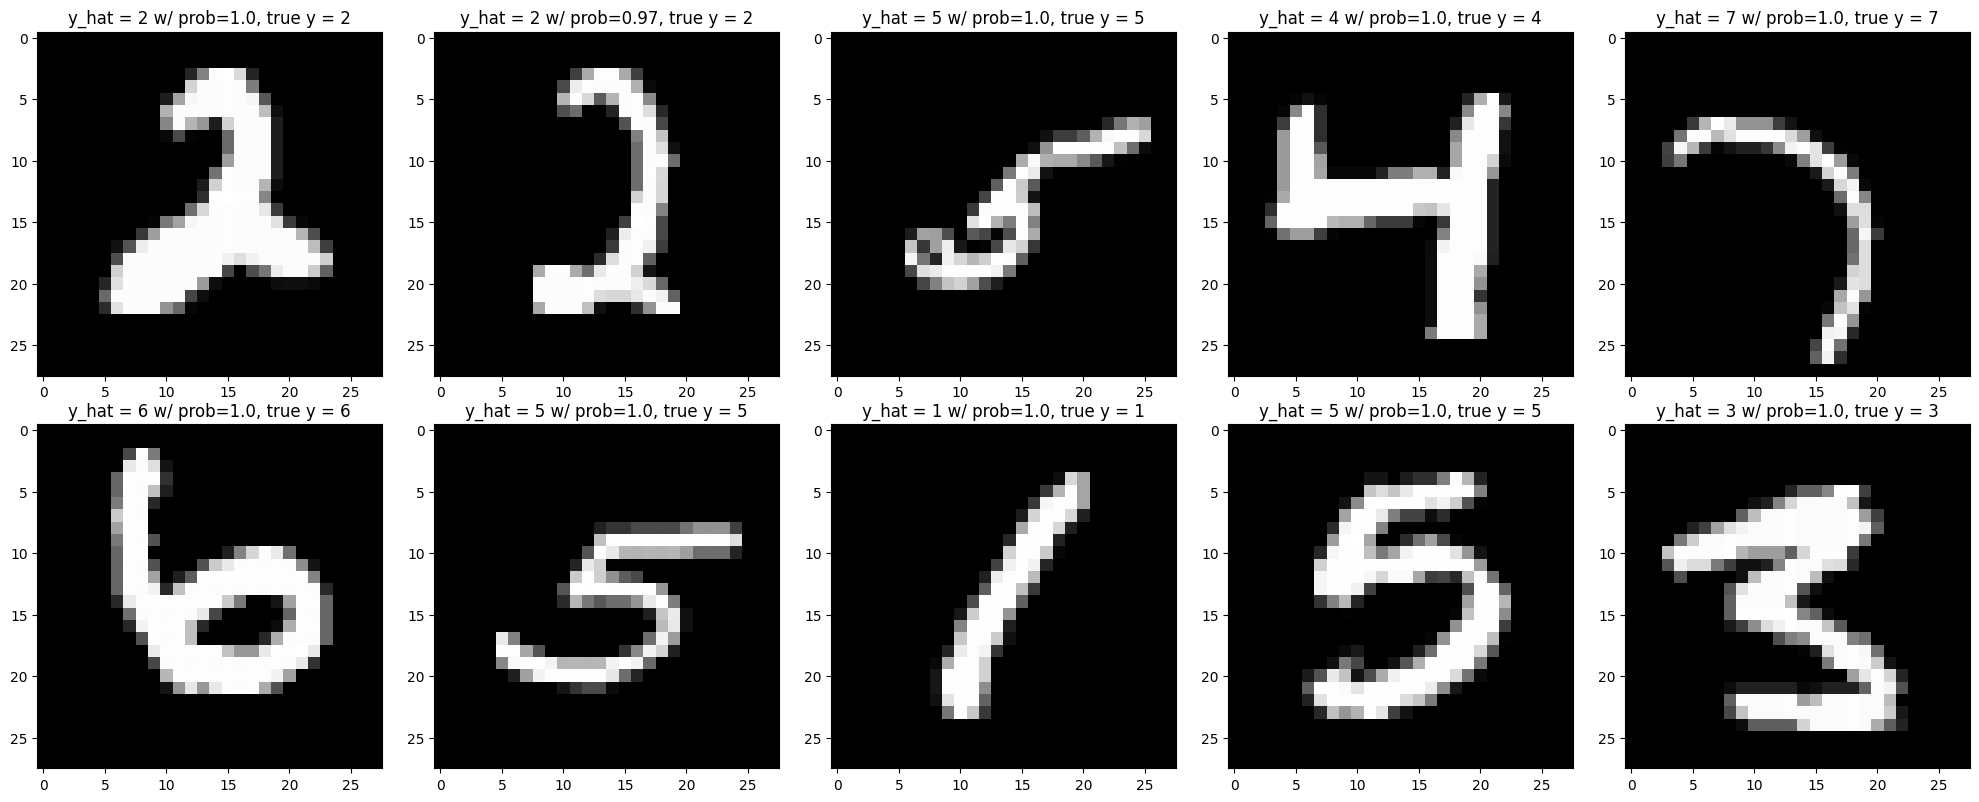

In [74]:
num_col = 5
num_row = 2
nums = 10

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(4*num_col,4*num_row))
for i in range(nums):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_val[i].reshape(28,28), cmap='gray')
    ax.set_title(f'y_hat = {y_hat_3[i]} w/ prob={round(np.max(prob_3[i]), 2)}, true y = {y_val[i]}')
plt.tight_layout()
plt.show()

In [77]:
confusion_matrix_3 = confusion_matrix(y_val, y_hat_3)
print(confusion_matrix_3)

[[848   0   2   0   2   0   1   0   2   2]
 [  0 933   0   0   1   0   0   0   3   2]
 [  3   6 763   8   2   0   0   9   7   2]
 [  2   1   4 864   0  11   0   2   8   3]
 [  1   3   0   0 763   0   1   2   0  13]
 [  2   1   0  10   1 733   6   1   2   4]
 [  2   0   0   1   0   7 844   0   0   1]
 [  1   5   7   1   3   1   0 833   1   7]
 [  1   3   4   4   3   5   3   3 792   2]
 [  4   2   1   3   8   5   0   4   5 800]]
